<br></br>
<br></br>
<br></br>
<br></br>
# <center>Data Science and Business Analytics
## <center>Task-2: Prediction using UnSupervised ML
<br></br>   
## Name : HELI VACHHANI
<br></br>
<br></br>

## Step-1: Imports

In [29]:
# importing basic libraries
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [30]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

## Step-2: Data preprocessing

In [33]:
path = 'Iris.csv'
dataset = pd.read_csv(path)

In [34]:
# displays the first five rows to check the data loading done in a right way
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
# To understand above shape of data
dataset.shape    # First,second vals tell about no of rows and columns respectively

(150, 6)

In [36]:
# Include O gives the information about categorical data
dataset.describe(include =['O'])

,Species
count,150
unique,3
top,Iris-setosa
freq,50


In [37]:
# gives info about columns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [38]:
dataset.corr()  #gives correlation btw columns

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [39]:
dataset['Species'].unique()   # to know about different types of species

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## **We have only Three kind of flowers**


## Step-3: Data-Visualization

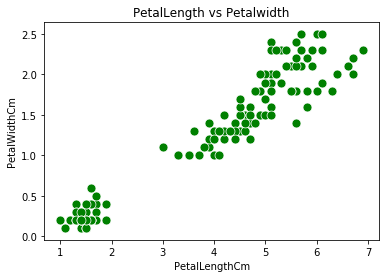

In [40]:
sns.scatterplot(x=dataset['PetalLengthCm'],y = dataset['PetalWidthCm'], s = 80, color='green')  # s - size of points
plt.title('PetalLength vs Petalwidth')
plt.show()

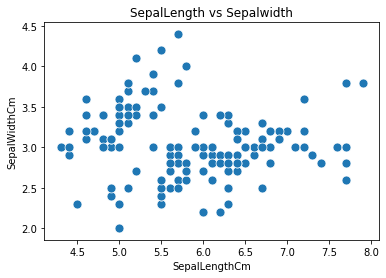

In [41]:
sns.scatterplot(x=dataset['SepalLengthCm'],y = dataset['SepalWidthCm'], s = 80)
plt.title('SepalLength vs Sepalwidth')
plt.show()



### Now, We are going to consider only specifications of flowers( i.e, SepalLengthCm, SepalWidthCm,	PetalLengthCm,	PetalWidthCm) and dropping Species(5th) column


##**Extracting data without labels for clustering**

In [42]:
data = dataset.iloc[:,1:5].values
data[0:10] # to check the data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

## Step-4: Elbow method to figure out optimum number of clusters 

### In order to find optimum number of clusters, let us see step by step approach of Elbow Method


1.  First take few values for k, i.e number of clusters(say 1-10)
2. Calculate the Within cluster Sum of Squares(WSS) value for each k-value
> Finding WSS value, can be done in two ways:
    1. Using Inertia method, where we take summation of all cluster sample squared distances from centriod
    1. Using Distortion Method, where we take mean of cluster point's distance instead of summation
3. Plot the graph for WSS and k values
4. The optimim k value can be easily determined from graph, see the starting point where continuous linear changing(Less and constant decrement in WSS for all remaining k points) first occurs 





### Elbow Method using Inertial WSS

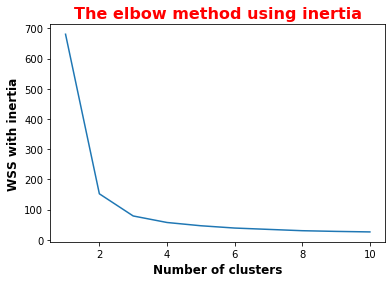

In [43]:
X = data

fontdict = {'fontweight':'bold','color':'red', 'fontsize':'16'}
fontdict1 = {'fontweight':'bold', 'fontsize':'12'}
from sklearn.cluster import KMeans
wcss = []


for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method using inertia',fontdict)
plt.xlabel('Number of clusters',fontdict1)
plt.ylabel('WSS with inertia',fontdict1) # Within cluster sum of squares
plt.show()

### Elbow Method using distortional WSS

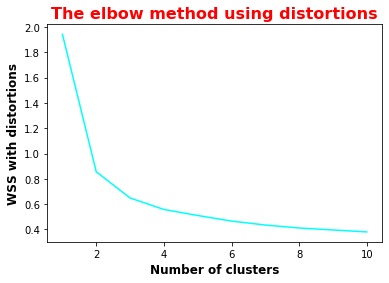

In [44]:
from scipy.spatial.distance import cdist

distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10)
    kmeans.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
plt.plot(range(1, 11), distortions, color='cyan')
plt.title('The elbow method using distortions', fontdict)
plt.xlabel('Number of clusters',fontdict1)
plt.ylabel('WSS with distortions',fontdict1) # Within cluster sum of squares
plt.show()

## Now we can easily make sense why this method is called as Elbow Method as the graph looks similar to human elbow.

## **From Two graphs, we can conclude that optimum number of clusters is 3.<br>**     
Because from k=3, we can notice the continuous(non-varying) linear relation between WSS and number of clusters


## Step-5: K-Means Clustering Implementation

In [45]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,random_state=0)   # Here, We have taken value of n_clusters using elbow method and random_state= 0 means there is no randomness
kmeans.fit(data)
ykmeans = kmeans.predict(data) #predicting the clusters based on features
print(ykmeans) 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


 ## Visualising the predicted and actual clusters - On the first two features(SepalLength, Sepalwidth)

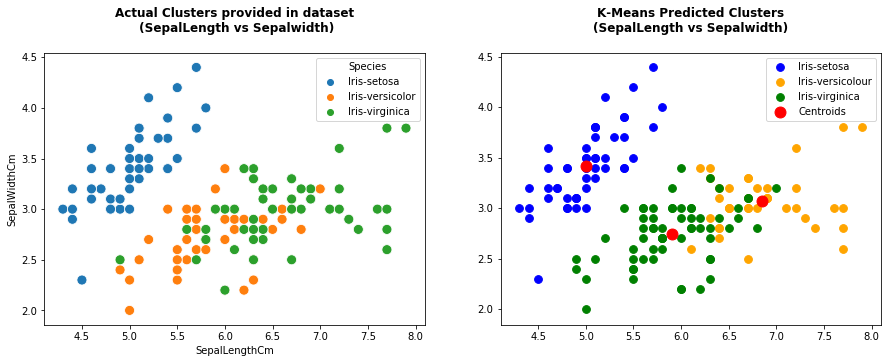

<Figure size 432x288 with 0 Axes>

In [46]:
plt.subplots(figsize=(15, 5))  #This sets the size of subplots
plt.subplot(1, 2, 2)

# For Left Side plot
# predicted cluster plot
plt.scatter(X[ykmeans == 1, 0], X[ykmeans == 1, 1], 
            s = 60, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[ykmeans == 2, 0], X[ykmeans == 2, 1],
            s = 60, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X[ykmeans == 0, 0], X[ykmeans == 0, 1], 
            s = 60, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 120, c = 'red', label = 'Centroids')
plt.title('K-Means Predicted Clusters\n(SepalLength vs Sepalwidth)\n ',fontdict1)
plt.legend()

# For Right Side plot
# Actual cluster plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=dataset['SepalLengthCm'],y = dataset['SepalWidthCm'], s = 100, hue = dataset['Species'])
plt.title('Actual Clusters provided in dataset\n (SepalLength vs Sepalwidth)\n',fontdict1)
plt.show()
plt.tight_layout(10)

 ## Visualising the predicted and actual clusters - On PetalLength, Petalwidth

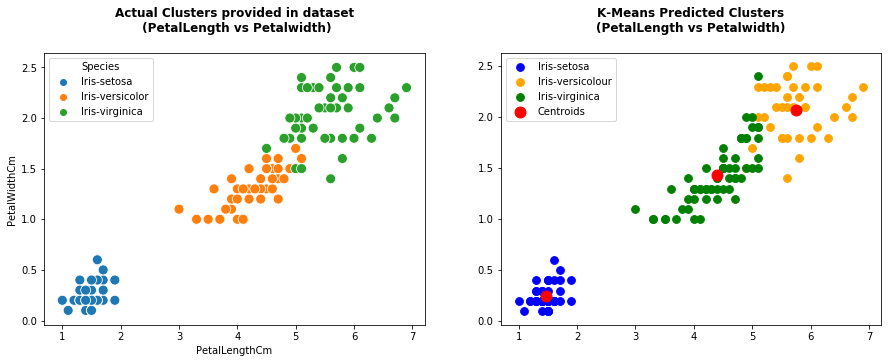

<Figure size 432x288 with 0 Axes>

In [47]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 2)

# For Left Side plot
# predicted cluster plot
plt.scatter(X[ykmeans == 1, 2], X[ykmeans == 1, 3],    # s-size of points, c-color
            s = 60, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[ykmeans == 2, 2], X[ykmeans == 2, 3],
            s = 60, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X[ykmeans == 0, 2], X[ykmeans == 0, 3], 
            s = 60, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], 
            s = 120, c = 'red', label = 'Centroids')
plt.title('K-Means Predicted Clusters\n(PetalLength vs Petalwidth)\n ',fontdict1)
plt.legend()

# For Right Side plot
# Actual cluster plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=dataset['PetalLengthCm'],y = dataset['PetalWidthCm'], s = 100, hue = dataset['Species'])
plt.title('Actual Clusters provided in dataset\n (PetalLength vs Petalwidth)\n',fontdict1)
plt.show()
plt.tight_layout(10)

## If you see closely, There are some errors in predicted clusters

In [48]:
# Encoding categoricl data to numerical to check for errors
species_dict = {
    'Iris-setosa': int('1'),
    'Iris-versicolor': int('2'),
    'Iris-virginica': int('0')
}

species = dataset['Species'].map(species_dict, dataset)
dataset['Species'] = species
yActual = dataset.iloc[:,5].values
print('The Actual flower species\n',yActual,'\nThe Predicted flower species\n',ykmeans)

The Actual flower species
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0] 
The Predicted flower species
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [49]:
# Verifying Both Values side by side
check_classif = pd.DataFrame({'Species_Actual': species, 'Species_Predicted':ykmeans})
check_classif[120:130]

,Species_Actual,Species_Predicted
120,0,2
121,0,0
122,0,2
123,0,0
124,0,2
125,0,2
126,0,0
127,0,0
128,0,2
129,0,2


##If U See Above, there are some errors in KMeans Prediction

##**Step 6: Model Evaluation**

#### **To Check the Accuracy of K-MEans Clustering**

In [50]:
from sklearn.metrics import accuracy_score
Kmns_accurcy = round(accuracy_score(yActual, ykmeans),5)
print('Accuracy of kmeans Clustering is ',Kmns_accurcy)

Accuracy of kmeans Clustering is  0.44


<br></br>
# Conclusion:

### The optimum number of clusters is 3 and Accuracy of K-Means Clustering is 89.33%

<br></br>
## The End